<a href="https://colab.research.google.com/github/ridho237/image-processing/blob/main/Pengolahan_Citra_M5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Python Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# 2. Membuka gambar

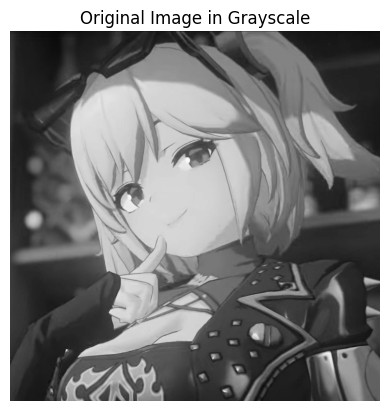

In [3]:
img = Image.open('burnice.jpeg').convert('L')  # Convert to grayscale for edge detection
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Image in Grayscale')
plt.show()

#3. Matriks kernel Sobel untuk deteksi tepi disumbu X dan Y

In [4]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

print("Sobel Kernel X:\n", sobel_x)
print("Sobel Kernel Y:\n", sobel_y)

Sobel Kernel X:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel Kernel Y:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


#4. Menggunakan filter Sobel untuk deteksi tepi disumbu X dan Y

In [5]:
img_sobel_x = img.filter(ImageFilter.Kernel((3, 3), sobel_x.flatten(), scale=1))
img_sobel_y = img.filter(ImageFilter.Kernel((3, 3), sobel_y.flatten(), scale=1))

#5. Menggabungkan Hasil untuk mendapatkan tepi keseluruhan

In [6]:
edge_img = np.sqrt(np.square(np.array(img_sobel_x)) + np.square(np.array(img_sobel_y)))
edge_img = Image.fromarray(np.uint8(edge_img))

#6. Menampilkan hasil filter edge detection

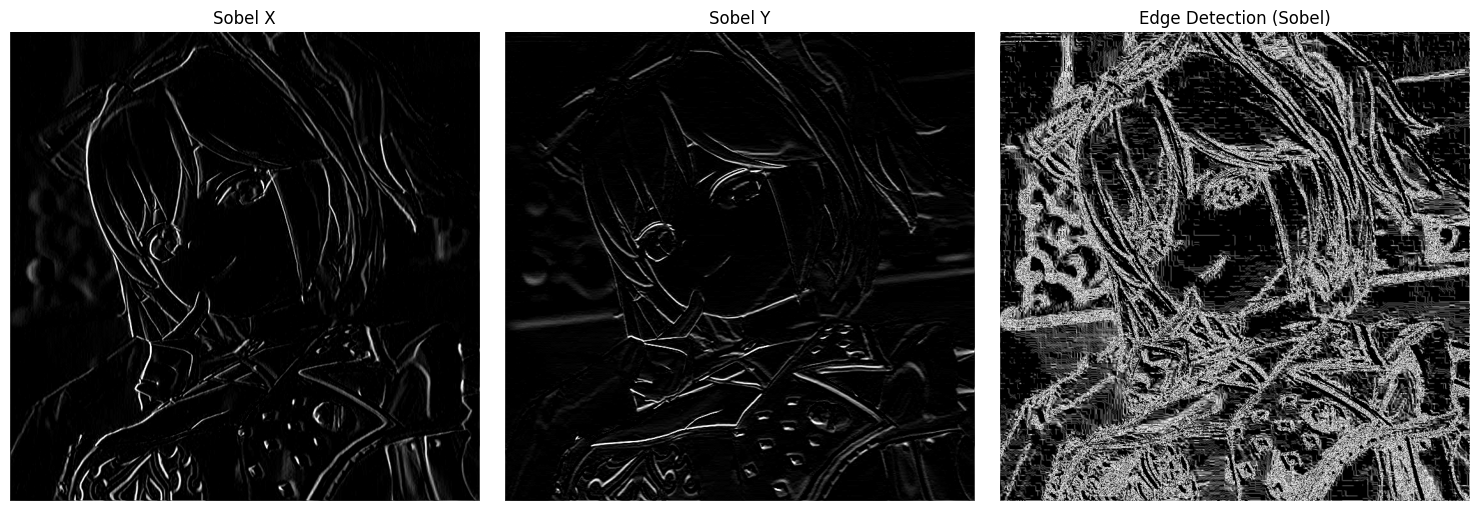

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_sobel_x, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Sobel X')

axs[1].imshow(img_sobel_y, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Sobel Y')

axs[2].imshow(edge_img, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Edge Detection (Sobel)')

plt.tight_layout()
plt.show()